In [ ]:
!pip install imageio-ffmpeg

In [2]:
import os 
import cv2
import glob
import torch
import shutil
import numpy as np
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import  time

# Preprocessing

In [32]:
%cd /content/

/content


In [3]:
!mkdir raw

In [51]:
#check input fps
video = cv2.VideoCapture('/content/drive/MyDrive/data/masked_video.mp4');

fps = video.get(cv2.CAP_PROP_FPS)
print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))

Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 23.98


In [54]:
#video to frames
capture = cv2.VideoCapture('/content/drive/MyDrive/data/masked_video.mp4')
 
frameNr = 0
 
while (True):
    success, frame = capture.read( )
 
    if success:
        cv2.imwrite(f'/content/raw/frame_{frameNr}.jpg', frame)
 
    else:
        break
 
    frameNr = frameNr+1
 
capture.release()
print(len(os.listdir('/content/raw')))

131


In [55]:
#function to display images in colab
def imshow(title = "Image", image = None, size = 15):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [59]:
img1_path = "/content/raw/frame_110.jpg"

In [60]:
img = cv2.imread(img1_path)

print(img.shape)

(1080, 1920, 3)


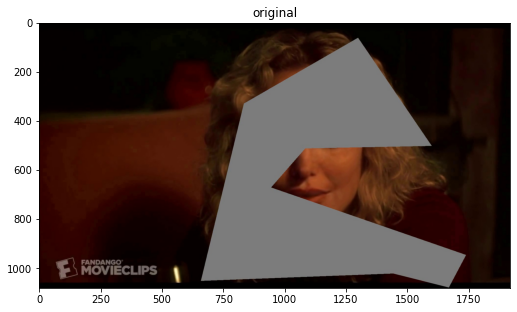

In [61]:
imshow("original", img)

In [79]:
#making crops for better result
image = img
height, width = image.shape[:2]

raw_img_dir = '/content/raw'
resized_crops_dir = '/content/test3'

start_row, start_col = 5, 550
rate = 2
end_row, end_col = start_row + 512*rate, start_col + 512*rate

In [63]:
end_row, end_col

(1029, 1574)

In [64]:
height, width

(1080, 1920)

In [65]:
#function to create mask
def inv(imagem):
    imagem = (255-imagem)
    return imagem

In [80]:
#create cropped images 512*512 for MAT
for i, filename in enumerate(os.listdir(raw_img_dir)):

    file_path = os.path.join(raw_img_dir, filename)

    img = cv2.imread(file_path)
    
    cr_img = img[start_row:end_row , start_col:end_col]

    cr_resized = cv2.resize(cr_img, (512,512), interpolation = cv2.INTER_AREA)

    num = filename.split('.')[0].split('_')[-1]
    newfilename = f'test{num}.png'

    cv2.imwrite(os.path.join(resized_crops_dir, newfilename),cr_resized)

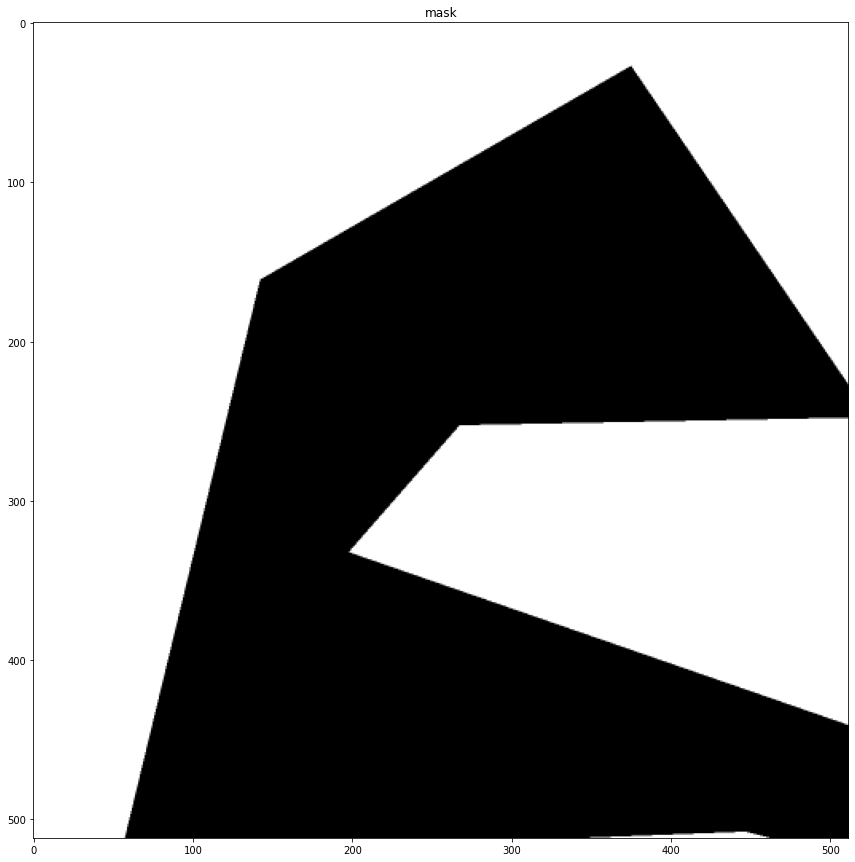

True

In [67]:
#mask creating

# Make empty black image
image=np.zeros((height,width,3),np.uint8)

inv_img = inv(image)

points = np.array([[1300,60], [835,328], [660,1050], [1444,1020], [1670,1077],[1740,945], [945, 670], [1085,510], [1600, 500]
])

mask = cv2.fillPoly(inv_img, pts=[points], color=(0,0,0))
cr_mask = mask[start_row:end_row , start_col:end_col]

mask_resized = cv2.resize(cr_mask, (512,512), interpolation = cv2.INTER_AREA)


imshow('mask',mask_resized)
#save
cv2.imwrite("mask512.png", mask_resized)


In [68]:
len(os.listdir(raw_img_dir))

131

In [81]:
mask_dir = '/content/masks3'

In [82]:
#creating masks 512*512 for MAT
for i in range(len(os.listdir(raw_img_dir))):
    newfilename = f'mask{i}.png'
    cv2.imwrite(os.path.join(mask_dir, newfilename),mask_resized)

#MAT transformer

In [19]:
!git clone https://github.com/fenglinglwb/MAT.git 

Cloning into 'MAT'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 199 (delta 40), reused 43 (delta 37), pack-reused 151
Receiving objects: 100% (199/199), 18.89 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [72]:
%cd /content/MAT

/content/MAT


In [ ]:
!pip install -r requirements.txt

In [ ]:
/content/drive/MyDrive/data/CelebA-HQ_512.pkl

In [83]:
%pwd

'/content/MAT'

In [85]:
!rm -R /content/MAT/samples

In [86]:
%mkdir samples

In [87]:
!rm -R /content/MAT/test_sets/CelebA-HQ/images
!rm -R /content/MAT/test_sets/CelebA-HQ/masks

In [88]:
!cp -r /content/test3/ /content/MAT/test_sets/CelebA-HQ/images
!cp -r /content/masks3 /content/MAT/test_sets/CelebA-HQ/masks

In [89]:
!python generate_image.py --network /content/drive/MyDrive/data/CelebA-HQ_512.pkl --dpath test_sets/CelebA-HQ/images --outdir samples --mpath test_sets/CelebA-HQ/masks

Loading data from: test_sets/CelebA-HQ/images
Loading mask from: test_sets/CelebA-HQ/masks
Loading networks from: /content/drive/MyDrive/data/CelebA-HQ_512.pkl
Prcessing: test0.png
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Prcessing: test1.png
Prcessing: test10.png
Prcessing: test100.png
Prcessing: test101.png
Prcessing: test102.png
Prcessing: test103.png
Prcessing: test104.png
Prcessing: test105.png
Prcessing: test106.png
Prcessing: test107.png
Prcessing: test108.png
Prcessing: test109.png
Prcessing: test11.png
Prcessing: test110.png
Prcessing: test111.png
Prcessing: test112.png
Prcessing: test113.png
Prcessing: test114.png
Prcessing: test115.png
Prcessing: test116.png
Prcessing: test117.png
Prcessing: test118.png
Prcessing: test119.png
Prcessing: test12.png
Prcessing: test120.png
Prcessing: test121.png
Prcessing: test122.png
Prcessing: test123.png
Prcessing: test124.png
Prcessing: test125.png
Prcessing: test126.png
Prce

In [ ]:
!mkdir /content/res

In [92]:
res_dir = '/content/res'

In [93]:
#paste crop from MAT to raw images
for i, filename in enumerate(os.listdir(raw_img_dir)):

    file_path = os.path.join(raw_img_dir, filename)
    #print(file_path)

    num = filename.split('.')[0].split('_')[-1]
    crop_name = f'test{num}.png'

    crop_path = os.path.join('/content/MAT/samples', crop_name)

    img = cv2.imread(file_path)
    crop = cv2.imread(crop_path)
    crop_resized = cv2.resize(crop, (512*rate,512*rate), interpolation = cv2.INTER_AREA)
    
    img[start_row:end_row , start_col:end_col] = crop_resized

    newfilename = f'res{num}.png'

    cv2.imwrite(os.path.join(res_dir, newfilename), img)

In [94]:
#creating video
img_array = []

for i in range(len(os.listdir(res_dir))):
    file_name = f'/content/res/res{i}.png'
    f_path = os.path.join('/content/res', file_name)
    img = cv2.imread(f_path)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('result3.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()